## 

Using rotated to hz + OpenCv border

Basic default transforms

Using data with wrap instead of border_reflect_101 and imgaug to add classes

Note we dont use aug on irregular metal

valid + predicted unverified

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import geopandas as gpd
from resizeimage import resizeimage
import datetime
import uuid
from os import listdir
from os.path import isfile, join

In [3]:
torch.cuda.set_device(1)
torch.cuda.current_device()

1

In [4]:
data_dir = Path('data')

In [5]:
RETRAIN = True
RESIZE_IMAGES = True

In [6]:
MODEL_NAME='cv_reflect_imgaug'

In [7]:
NB_NUM='05_7'

In [8]:
DATE = datetime.datetime.today().strftime('%Y%m%d')
UID=str(uuid.uuid4())[:8]
print(f'UID: {UID}, DATE: {DATE}')                                                 

UID: 5df7c2ba, DATE: 20191110


In [9]:
#DATE ='20191028'
#UID='77dc216d'

In [10]:
SUB_NUM='17'

In [11]:
img_size=256

In [12]:
train_images=data_dir/f'train/rotated/clipped/reflect/{img_size}'
test_images=data_dir/f'test/rotated/clipped/reflect/{img_size}'

In [13]:
test_names = get_image_files(test_images)

In [14]:
assert len(test_names)==7325

In [15]:
df_all=pd.read_csv(data_dir/'df_train_all.csv')

In [16]:
df_all=df_all.drop_duplicates(subset=['id'])

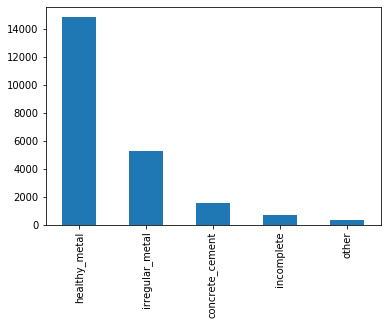

In [17]:
df_all['roof_material'].value_counts().plot(kind='bar')

In [18]:
df_v=df_all.loc[df_all['verified'] == True]

In [19]:
df_v=df_v.drop_duplicates(subset=['id'])

In [20]:
df_v['roof_material'].value_counts()

healthy_metal      7381
irregular_metal    5241
concrete_cement    1387
incomplete          668
other               193
Name: roof_material, dtype: int64

In [21]:
len(df_v)

14870

In [22]:
healthy_metal_frac=7381/14870

In [23]:
healthy_metal_n=7381

In [24]:
irregular_metal_frac=5241/14870

In [25]:
irregular_metal_n=5241

In [26]:
concrete_cement_frac=1387/14870

In [27]:
concrete_cement_n=1387

In [28]:
incomplete_frac=668/14870

In [29]:
incomplete_n=668

In [30]:
other_frac=668/14870

In [31]:
other_n=668

In [32]:
df_npu=pd.read_csv(data_dir/'non_predicted_unverfied.csv')

In [33]:
df_npu=df_npu.drop_duplicates(subset=['id'])

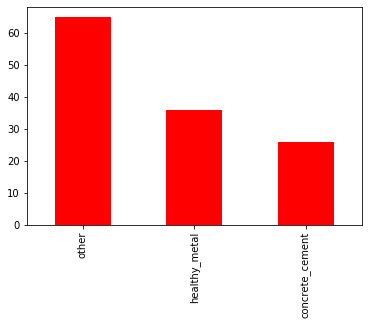

In [34]:
df_npu['roof_material'].value_counts().plot(kind='bar', color='red')

In [35]:
bad_ids=df_npu.id.values.tolist()

In [36]:
df_uv=df_all.loc[df_all['verified'] == False]

In [37]:
df_pred_v=df_uv.loc[~df_uv['id'].isin(bad_ids)]

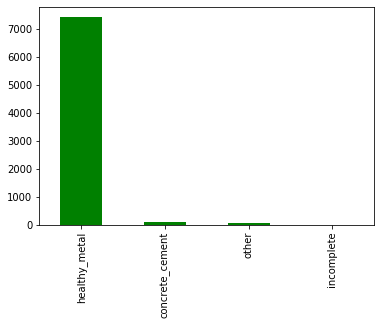

In [38]:
df_pred_v['roof_material'].value_counts().plot(kind='bar', color='green')

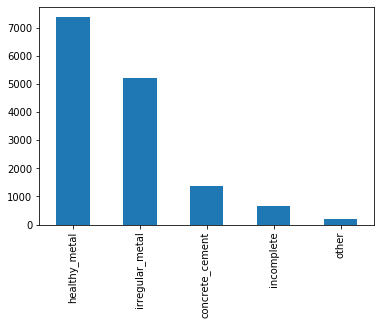

In [39]:
df_v['roof_material'].value_counts().plot(kind='bar')

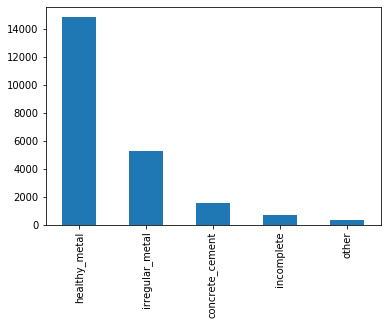

In [40]:
df_all['roof_material'].value_counts().plot(kind='bar')

In [41]:
df_aug=pd.read_csv(data_dir/'df_aug_reflect.csv')

In [42]:
len(df_aug)

171253

In [43]:
df_aug.tail()

,id,roof_material,verified,country,region
171248,7a214bda_imgaug_9_1005,concrete_cement,True,colombia,borde_rural
171249,7a2bfa30_imgaug_7_5683,healthy_metal,True,colombia,borde_soacha
171250,7a3dc152_imgaug_3_1483,healthy_metal,True,colombia,borde_rural
171251,7a3c9b10_imgaug_4_5386,healthy_metal,True,colombia,borde_soacha
171252,7a20854c_imgaug_7_14480,healthy_metal,True,st_lucia,dennery


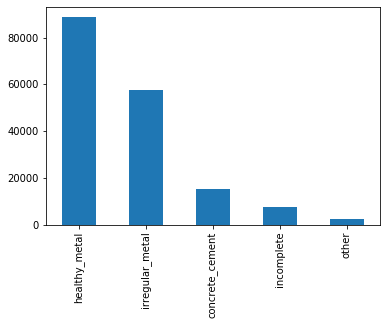

In [44]:
df_aug['roof_material'].value_counts().plot(kind='bar')

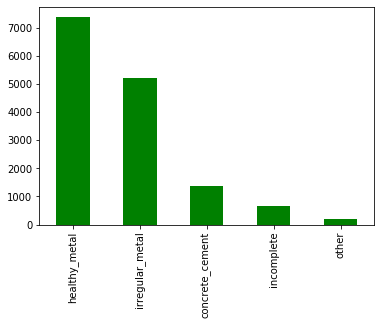

In [45]:
df_v['roof_material'].value_counts().plot(kind='bar', color='green')

In [46]:
df_img=df_aug[df_aug.id.str.contains('imgaug')]

In [47]:
len(df_img)

148700

In [48]:
df_irreg_aug=df_img.loc[df_img['roof_material'] == 'irregular_metal']

In [49]:
df_healthy_aug=df_img.loc[df_img['roof_material'] == 'healthy_metal']

In [50]:
df_concrete_aug=df_img.loc[df_img['roof_material'] == 'concrete_cement']

In [51]:
df_incomplete_aug=df_img.loc[df_img['roof_material'] == 'incomplete']

In [52]:
df_other_aug=df_img.loc[df_img['roof_material'] == 'other']

In [53]:
len(df_irreg_aug)

52410

In [54]:
len(df_healthy_aug)

73810

In [55]:
len(df_concrete_aug)

13870

In [56]:
len(df_incomplete_aug)

6680

In [57]:
len(df_other_aug)

1930

In [58]:
### append a fixed number eg 1000 images to each class

In [59]:
df_irreg_aug = df_irreg_aug.sample(n=irregular_metal_n)
df_irreg_aug.head()

,id,roof_material,verified,country,region
45677,7a363e1e_imgaug_8_5544,irregular_metal,True,colombia,borde_soacha
43434,7a1d2ab4_imgaug_5_6854,irregular_metal,True,colombia,borde_soacha
124915,7a37b29e_imgaug_2_13201,irregular_metal,True,guatemala,mixco_1_and_ebenezer
131312,7a1eeca0_imgaug_6_10228,irregular_metal,True,colombia,borde_soacha
134701,7a2aee74_imgaug_5_12050,irregular_metal,True,guatemala,mixco_1_and_ebenezer


In [60]:
df_healthy_aug = df_healthy_aug.sample(n=healthy_metal_n)
df_healthy_aug.head()

,id,roof_material,verified,country,region
162117,7a364ecc_imgaug_2_9433,healthy_metal,True,colombia,borde_soacha
68388,7a2664f8_imgaug_0_13269,healthy_metal,True,guatemala,mixco_1_and_ebenezer
75474,7a31df2c_imgaug_9_10308,healthy_metal,True,colombia,borde_soacha
112074,7a42b996_imgaug_2_14360,healthy_metal,True,st_lucia,dennery
73515,7a3c50a6_imgaug_6_1545,healthy_metal,True,colombia,borde_rural


In [61]:
df_concrete_aug=df_concrete_aug.sample(n=concrete_cement_n)
df_concrete_aug.head()

,id,roof_material,verified,country,region
71711,7a251b5c_imgaug_3_8473,concrete_cement,True,colombia,borde_soacha
121525,7a3e3bfa_imgaug_8_479,concrete_cement,True,colombia,borde_rural
84707,7a3255ec_imgaug_3_12457,concrete_cement,True,guatemala,mixco_1_and_ebenezer
88203,7a3fca92_imgaug_2_10387,concrete_cement,True,guatemala,mixco_1_and_ebenezer
161869,7a3d18f6_imgaug_9_13243,concrete_cement,True,guatemala,mixco_1_and_ebenezer


In [62]:
df_incomplete_aug=df_incomplete_aug.sample(n=incomplete_n)
df_incomplete_aug.head()

,id,roof_material,verified,country,region
68464,7a2dd4b8_imgaug_4_9769,incomplete,True,colombia,borde_soacha
158696,7a2d048e_imgaug_9_9976,incomplete,True,colombia,borde_soacha
142249,7a1e4ade_imgaug_4_302,incomplete,True,colombia,borde_rural
77589,7a223d2e_imgaug_0_596,incomplete,True,colombia,borde_rural
124391,7a2ffea0_imgaug_7_4143,incomplete,True,colombia,borde_rural


In [63]:
df_v.head()

,id,roof_material,verified,country,region
0,7a3f2a10,concrete_cement,True,colombia,borde_rural
1,7a1f731e,irregular_metal,True,colombia,borde_rural
2,7a424ad8,healthy_metal,True,colombia,borde_rural
3,7a3edc5e,healthy_metal,True,colombia,borde_rural
4,7a303a6e,healthy_metal,True,colombia,borde_rural


In [64]:
df_other_aug=df_other_aug.sample(n=other_n)
df_other_aug.head()

,id,roof_material,verified,country,region
63284,7a353e24_imgaug_1_11792,other,True,guatemala,mixco_1_and_ebenezer
142678,7a269b08_imgaug_7_11227,other,True,guatemala,mixco_1_and_ebenezer
126518,7a3d7dfa_imgaug_4_1244,other,True,colombia,borde_rural
80034,7a29181a_imgaug_7_12293,other,True,guatemala,mixco_1_and_ebenezer
25185,7a220b06_imgaug_3_7997,other,True,colombia,borde_soacha


#### concat

In [65]:
len(df_v)

14870

In [66]:
frames = [df_irreg_aug, df_healthy_aug, df_concrete_aug, df_incomplete_aug, df_other_aug]

In [67]:
df_all_aug = pd.concat(frames)

In [68]:
df_all_aug = df_v.append(df_all_aug, ignore_index=True)

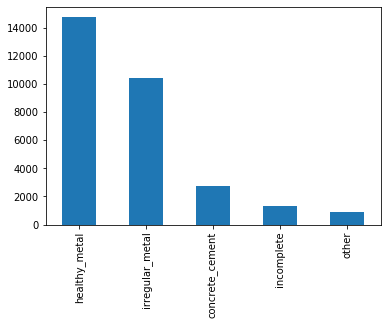

In [69]:
df_all_aug['roof_material'].value_counts().plot(kind='bar')

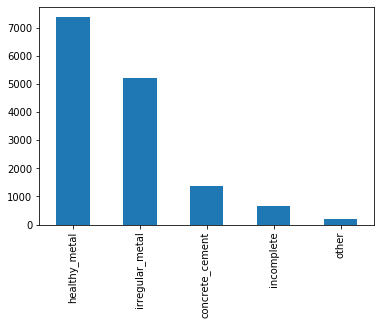

In [70]:
df_v['roof_material'].value_counts().plot(kind='bar')

In [71]:
#### add predicted unverified

In [72]:
df_all_aug = df_all_aug.append(df_pred_v, ignore_index=True)

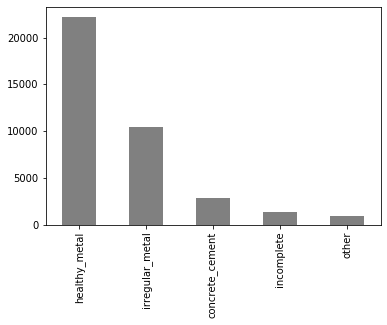

In [73]:
df_all_aug['roof_material'].value_counts().plot(kind='bar', color='gray')

#### test data

In [74]:
df_test=pd.read_csv(data_dir/'df_test_all.csv')

In [75]:
df_test.tail()

,id,country,region
7320,7a4f3ff4,st_lucia,dennery
7321,7a4fc578,st_lucia,dennery
7322,7a4ac7b2,st_lucia,dennery
7323,7a47e25e,st_lucia,dennery
7324,7a4e3f78,st_lucia,dennery


In [76]:
assert len(df_test)==7325

In [77]:
df_all_aug.loc[df_all_aug['id'] == '7a204ec4']

,id,roof_material,verified,country,region
12960,7a204ec4,irregular_metal,True,guatemala,mixco_1_and_ebenezer


In [78]:
len(df_all_aug)

37771

To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [79]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

### setup dataset

In [80]:
np.random.seed(42)
dep_var='roof_material'
src = (ImageList.from_df(path=train_images, df=df_all_aug, cols='id', suffix='.tif')
       .split_by_rand_pct(0.2)
      .label_from_df(cols=dep_var)
      .add_test_folder(test_images))

In [81]:
data = (src.transform(tfms, size=img_size)
        .databunch().normalize(imagenet_stats))

In [82]:
#to check what params object has
#dir(data)

In [83]:
data.label_list

LabelLists;

Train: LabelList (30217 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (7554 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
other,other,healthy_metal,irregular_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256

In [84]:
data.loss_func

FlattenedLoss of CrossEntropyLoss()

`show_batch` still works, and show us the different labels separated by `;`.

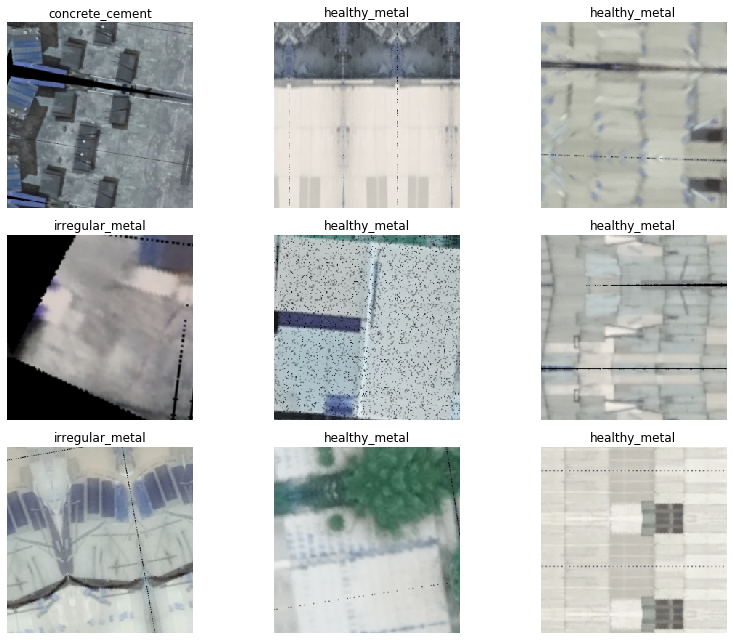

In [85]:
data.show_batch(rows=3, figsize=(12,9))

### Model

In [86]:
arch = models.resnet50
arch_name = 'rn50'

In [87]:
learn = cnn_learner(data, arch, metrics=error_rate, bn_final=True).to_fp16()

### Train model

In [88]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


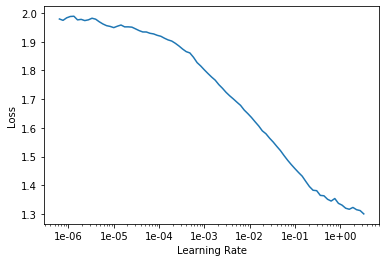

In [89]:
learn.recorder.plot()

Then we can fit the head of our network.

In [90]:
lr = 1e-2

In [91]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.645676,0.540946,0.185729,01:51
1,0.483378,0.432727,0.164416,01:53
2,0.424812,0.388299,0.146015,01:58
3,0.401667,0.365123,0.134498,02:03
4,0.389024,0.363357,0.136881,02:17


In [92]:
learn.save(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

#### Load model

In [93]:
learn.load(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (30217 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (7554 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
other,other,healthy_metal,irregular_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False

In [94]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('irregular_metal', 'healthy_metal', 351),
 ('healthy_metal', 'irregular_metal', 238),
 ('incomplete', 'irregular_metal', 118),
 ('concrete_cement', 'healthy_metal', 71),
 ('other', 'healthy_metal', 44),
 ('incomplete', 'healthy_metal', 30),
 ('concrete_cement', 'irregular_metal', 29),
 ('healthy_metal', 'concrete_cement', 28),
 ('incomplete', 'concrete_cement', 26),
 ('irregular_metal', 'incomplete', 26),
 ('other', 'irregular_metal', 19),
 ('concrete_cement', 'incomplete', 16),
 ('irregular_metal', 'concrete_cement', 14),
 ('healthy_metal', 'other', 11),
 ('irregular_metal', 'other', 7),
 ('healthy_metal', 'incomplete', 5),
 ('other', 'concrete_cement', 2)]

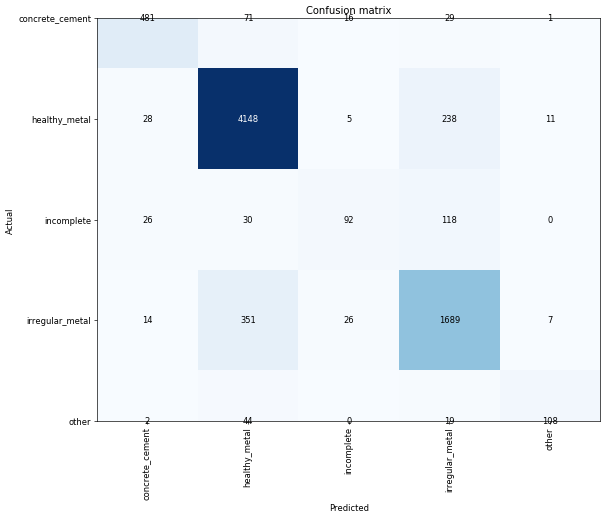

In [95]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

### Re-train

In [96]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


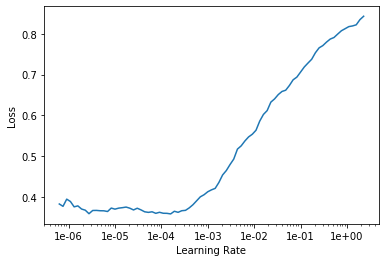

In [97]:
learn.lr_find()
learn.recorder.plot()

In [98]:
learn.fit_one_cycle(5, slice(2e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.402907,0.372161,0.142044,02:46
1,0.383632,0.355668,0.129071,02:48
2,0.339700,0.322463,0.118745,02:42
3,0.270116,0.290486,0.103918,02:30
4,0.226800,0.282939,0.100741,02:21


In [99]:
learn.save(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

In [100]:
learn.load(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (30217 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (7554 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
other,other,healthy_metal,irregular_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False

In [101]:
learn.fit_one_cycle(5, slice(2e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.252578,0.319002,0.115700,02:25
1,0.281201,0.306700,0.107890,02:26
2,0.228415,0.276251,0.096770,02:42
3,0.157719,0.243679,0.083267,02:53
4,0.123446,0.240285,0.080884,02:51


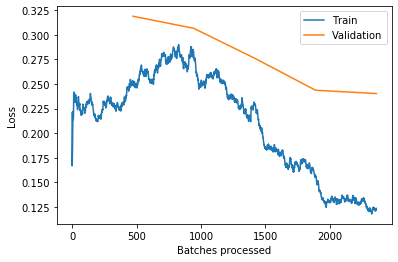

In [102]:
learn.recorder.plot_losses()

In [103]:
learn.save(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

### fp32

In [104]:
learn.load(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (30217 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (7554 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
other,other,healthy_metal,irregular_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False

In [105]:
learn = learn.to_fp32()

In [106]:
learn.export(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.pkl')

In [107]:
learn.export()

### inference

In [108]:
#test_images=data_dir/f'test/rotated/clipped/{img_size}'
test_dataset=ImageList.from_folder(test_images)

In [109]:
len(test_dataset)

7325

In [110]:
learn = load_learner(path=data_dir/f'train/rotated/clipped/reflect/{img_size}', test=test_dataset)

In [111]:
learn.data.loss_func

FlattenedLoss of CrossEntropyLoss()

In [112]:
type(learn.data)

fastai.vision.data.ImageDataBunch

In [113]:
type(learn.dl(DatasetType.Test))

fastai.basic_data.DeviceDataLoader

In [114]:
len(learn.dl(DatasetType.Test))

115

Get number of items in the Valid dataset (in DeviceDataLoader)

In [115]:
#assert len(learn.dl(DatasetType.Test).dl)==7325

Required format:
    
<pre>
id	concrete_cement	healthy_metal	incomplete	irregular_metal	other
7a4d630a	0.9	0	0	0	0
7a4bbbd6	0.9	0	0	0	0
7a4ac744	0.9	0	0	0	0
7a4881fa	0.9	0	0	0	0
7a4aa4a8	0.9	0	0	0	0
</pre>


In [116]:
preds,y= learn.get_preds(ds_type=DatasetType.Test)

In [117]:
labels = np.argmax(preds, 1)

In [118]:
len(preds)

7325

In [119]:
preds[0].tolist()

[0.06571679562330246,
 0.9312103390693665,
 0.0013122053351253271,
 0.0005809752037748694,
 0.0011795272585004568]

In [120]:
preds_list=[]
for pred in preds:
    preds_list.append(pred.tolist())

In [121]:
len(labels)

7325

In [122]:
learn.data.classes

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']

In [123]:
data.classes

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']

In [124]:
test_predictions = [learn.data.classes[int(x)] for x in labels]

In [125]:
test_predictions[0]

'healthy_metal'

In [126]:
type(learn.data.test_ds)

fastai.data_block.LabelList

In [127]:
 learn.data.test_ds.x.items

array([PosixPath('data/test/rotated/clipped/reflect/256/7a4d9168.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4ae922.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a48ca98.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a49c614.tif'), ...,
       PosixPath('data/test/rotated/clipped/reflect/256/7a486800.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4c49fc.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a501f50.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4d27b4.tif')], dtype=object)

In [128]:
ids=[]
for item in learn.data.test_ds.x.items:
    base, id = os.path.split(item)
    id = id.split('.tif')[0]
    ids.append(id)

In [129]:
preds_list[0]

[0.06571679562330246,
 0.9312103390693665,
 0.0013122053351253271,
 0.0005809752037748694,
 0.0011795272585004568]

In [130]:
cols = learn.data.classes.copy()
cols.insert(0,'id')
df = pd.DataFrame(list(zip(ids, preds_list)), 
               columns =['id', 'pred']) 

In [131]:
cols

['id',
 'concrete_cement',
 'healthy_metal',
 'incomplete',
 'irregular_metal',
 'other']

In [132]:
df.head()

,id,pred
0,7a4d9168,"[0.06571679562330246, 0.9312103390693665, 0.00..."
1,7a4ae922,"[0.003149480326101184, 0.9707477688789368, 0.0..."
2,7a48ca98,"[0.005692620296031237, 0.3730638027191162, 0.0..."
3,7a49c614,"[0.0010761184385046363, 0.9464386105537415, 0...."
4,7a4dd4f2,"[0.003996189683675766, 0.6459261178970337, 0.0..."


In [133]:
pred_df = pd.DataFrame(df['pred'].values.tolist())

In [134]:
pred_df.insert(loc=0, column='id', value=ids)

In [135]:
pred_df.columns = cols

In [136]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d9168,0.065717,0.931210,0.001312,0.000581,0.001180
1,7a4ae922,0.003149,0.970748,0.000632,0.024779,0.000692
2,7a48ca98,0.005693,0.373064,0.042189,0.570974,0.008080
3,7a49c614,0.001076,0.946439,0.002957,0.048316,0.001213
4,7a4dd4f2,0.003996,0.645926,0.001225,0.346803,0.002049


Required format:
    
<pre>
id	concrete_cement	healthy_metal	incomplete	irregular_metal	other
7a4d630a	0.9	0	0	0	0
7a4bbbd6	0.9	0	0	0	0
7a4ac744	0.9	0	0	0	0
7a4881fa	0.9	0	0	0	0
7a4aa4a8	0.9	0	0	0	0
</pre>


In [137]:
#pred_df = pd.read_csv(data_dir/f'submissions/stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv')

In [138]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d9168,0.065717,0.931210,0.001312,0.000581,0.001180
1,7a4ae922,0.003149,0.970748,0.000632,0.024779,0.000692
2,7a48ca98,0.005693,0.373064,0.042189,0.570974,0.008080
3,7a49c614,0.001076,0.946439,0.002957,0.048316,0.001213
4,7a4dd4f2,0.003996,0.645926,0.001225,0.346803,0.002049


In [139]:
pred_ids=pred_df['id'].values.tolist()

In [140]:
df_baseline = pd.read_csv(data_dir/f'submissions/mean_baseline.csv')

In [141]:
df_baseline.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.093275,0.496369,0.044923,0.352455,0.012979
1,7a4bbbd6,0.093275,0.496369,0.044923,0.352455,0.012979
2,7a4ac744,0.093275,0.496369,0.044923,0.352455,0.012979
3,7a4881fa,0.093275,0.496369,0.044923,0.352455,0.012979
4,7a4aa4a8,0.093275,0.496369,0.044923,0.352455,0.012979


In [142]:
baseline_ids=df_baseline['id'].values.tolist()

In [143]:
baseline_ids

['7a4d630a',
 '7a4bbbd6',
 '7a4ac744',
 '7a4881fa',
 '7a4aa4a8',
 '7a514434',
 '7a485f72',
 '7a4b8d32',
 '7a47eb3c',
 '7a4be3ae',
 '7a46a330',
 '7a481620',
 '7a49c678',
 '7a4ea044',
 '7a47aa1e',
 '7a51aa1e',
 '7a498be0',
 '7a4a2848',
 '7a4c4cd6',
 '7a465038',
 '7a4e94aa',
 '7a49f62a',
 '7a45b6f0',
 '7a50bb90',
 '7a4d38e4',
 '7a48a3a6',
 '7a4ebe9e',
 '7a48352e',
 '7a4bfaec',
 '7a51e060',
 '7a4c0f5a',
 '7a4b9976',
 '7a4b27d4',
 '7a51c698',
 '7a474bb4',
 '7a480054',
 '7a4a4044',
 '7a4c35ca',
 '7a4d3fd8',
 '7a4c1a68',
 '7a4eb1c4',
 '7a4a51ce',
 '7a4a14fc',
 '7a5015d2',
 '7a4ba95c',
 '7a5101ae',
 '7a4d0a22',
 '7a5134ee',
 '7a4a85c2',
 '7a514b14',
 '7a4d0a90',
 '7a485fd6',
 '7a4f668c',
 '7a44e752',
 '7a5162d4',
 '7a465894',
 '7a4c9a10',
 '7a485810',
 '7a4a9788',
 '7a503198',
 '7a4e206a',
 '7a4c15ea',
 '7a4f8536',
 '7a513df4',
 '7a4d7624',
 '7a4c9e8e',
 '7a4b2554',
 '7a502b12',
 '7a4c32e6',
 '7a4a8a2c',
 '7a467b76',
 '7a51b554',
 '7a4622e8',
 '7a4a599e',
 '7a4d17c4',
 '7a4fb740',
 '7a4ceed4',

In [144]:
assert set(pred_ids)==set(baseline_ids)

#### sort by baseline ids

In [145]:
pred_df['id_cat'] = pd.Categorical(
    pred_df['id'], 
    categories=baseline_ids, 
    ordered=True
)

In [146]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id_cat
0,7a4d9168,0.065717,0.931210,0.001312,0.000581,0.001180,7a4d9168
1,7a4ae922,0.003149,0.970748,0.000632,0.024779,0.000692,7a4ae922
2,7a48ca98,0.005693,0.373064,0.042189,0.570974,0.008080,7a48ca98
3,7a49c614,0.001076,0.946439,0.002957,0.048316,0.001213,7a49c614
4,7a4dd4f2,0.003996,0.645926,0.001225,0.346803,0.002049,7a4dd4f2


In [147]:
pred_df=pred_df.sort_values('id_cat')

In [148]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id_cat
716,7a4d630a,0.001820,0.992404,0.000489,0.004888,0.000399,7a4d630a
764,7a4bbbd6,0.000673,0.996947,0.000270,0.001966,0.000144,7a4bbbd6
1841,7a4ac744,0.024217,0.156574,0.067529,0.747078,0.004602,7a4ac744
3363,7a4881fa,0.000348,0.005175,0.003780,0.990391,0.000307,7a4881fa
133,7a4aa4a8,0.003467,0.924874,0.004621,0.064844,0.002194,7a4aa4a8


In [149]:
pred_df.drop(columns=['id_cat'],inplace=True)

In [150]:
assert (len(pred_df))==7325

In [151]:
pred_df.to_csv(data_dir/f'submissions/stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv', index=False)